# I. Decision Trees


Decision trees are predictive models widely used in Supervised Learning:
- For both classification and regression tasks
- Hierarchical structures used to model sequences of decisions based on successive/iterative tests on variables
- In Graph Theory, Tree = undirected, acyclic, and connected graph

<br>
  

### Pros \& Cons

- Quick to train, simp
- Simplicity, interpretability
- Ability to handle mixed data (categorical, continuous)
- Linear Decision boundaries


- Can be prone to overfitting, particularly with small sample sizes
- Regularizing them hurts performance a lot
- Failures can occur if real data are non-linear or noisy


### 

## 1. Nodes


The nodes in a tree are categorized 3 types:

**1. Root Node**
- Starting point of the tree (unique)
- Representing the initial decision or test


**2. Internal Nodes**
- Each one represents a test performed on 1 of the variables
- Then, split data into branches/subsets according to test results ()
> For categorical variables: Tests split data into branches, 1 for each category
>
> For numerical variables: Test use a threshold to divide data into intervals


**3. Leaf Nodes**
- Endpoints of the tree 
- Provides the decision (classification, prediction)


Once the decision tree constructed, classifying a new candidate involves traversing the tree from the root node to one of the leaf nodes 



## 2. Building the Tree

Steps for constructing a tree include:
1. Determining which variable/attribute to test at each node
2. Splitting data into homogeneous branches/subgroups based on tests
3. Recursively continuing segmentation until reaching leaves (or stopping criteria)



## 3. Decision Trees Examples


There are several methods/algos to choose the best attribute to place in a node:

1. C4.5, C5.0 Algorithm
2. CHAID (Chi-squared Automatic Interaction Detector)
3. ID3 (Iterative Dichotomiser 3): Uses Entropy
4. CART (Classification And Regression Trees): Uses Gini Index
- considered as the best since it uniquely addresses:
    - Which explanatory variable to choose?
    - How to set the split threshold for continuous variables?
    - How to determine the optimal tree size?



## 3. Impurity (Heterogeneity) Measures

Impurity measures how mixed the data is in a decision tree node:
- A pure/homogenous node (impurity = 0) contains only one class
- Pure = Data points within a node are more likely to belong to a single class
- Measures: Gini Index, Entropy




<div style="text-align: center;">
  <img src="https://www.michaelfxu.com/assets/images/posts/xgboost/decision_tree/gini_formula.png" width="500">
</div>


___


## 4. CART Algorithm (Classification And Regression Trees)

- Accepts all types of variables
- Uses the Gini Index (Impurity) as criterion for separation


### Gini Index (Impurity Measure)


$$ Gini(S) = \sum_{i=1}^{m} p_i (1 - p_i) = \sum_{i=1}^{m} \left( p_i - p_i^2 \right) = 1 - \sum_{i=1}^{m} p_i^2$$


- $\in [0, 1]$
- The lower, the better: choose the most separating/discriminating variable (that minimises $Gini(S)$)
- m: number of classes to splitted
- $p_i$: proportion of items in class $C_i$ in the set


<div style="text-align: center;">
  <img src="https://storage.googleapis.com/lds-media/images/gini-impurity-diagram.width-1200.png" width="500">
</div>



## 5. ID3 (Iterative Dichotomiser 3)


### Entropy (Impurity Measure)


Entropy represents the level of uncertainty/disorder/impurity of a variable in a dataset

$$ H(C_i) = - \sum_{i=1}^{m} p_i \log_{2}(p_i)$$

- $\in [0, 1]$
- The lower, the better 
- m: number of classes to splitted
- $p_i$: proportion of items in class $C_i$ in the set


**Interpretation**
- High Entropy: A dataset with a nearly equal distribution of classes (e.g., 50% of A, 50% of B), meaning it is uncertain/difficult to classify
- Low Entropy: A dataset where one class is dominant (e.g., 90% of A, 10% of B), meaning it’s easier to classify since most instances belong to 1 class



### Information Gain

It evaluates how much entropy is reduced after a split

$$ IG = H(S) - \sum_{i=1}^{m} p_i H(C_i)$$


- The higher, the better: choose the variable with the highest $IG$
- $H(S)$: entropy of parent node
- $H(S)$: entropy of class $C_i$ 
- $p_i$: proportion of items in class $C_i$ in the set


___

# Model Evaluation and Validation


## 1. Cross-Validation

## 2. ROC Curve

## 3. LIFT Curve



# II. Ensemble

Ensembles are ML techniques that consist in combining multiple decision trees:
- To make more efficient/better predictions or classifications
- Divided into parallel and sequential techniques
    - **Parallel**: Train models independently and combine their predictions for the final output
    - **Sequential**: Train models in sequence, where each model improves upon the errors of the previous one



| **Method**       | **Training** | **Combination**        | **Strength**                         | **Weakness**                    |
|-------------------|--------------|------------------------|---------------------------------------|----------------------------------|
| Bagging           | Parallel     | Aggregation (average/vote) | Reduces variance, prevents overfitting | May not reduce bias              |
| Random Forest     | Parallel     | Aggregation           | Reduces variance & feature randomness | May struggle with high bias      |
| Boosting          | Sequential   | Weighted combination  | Reduces bias, handles complex patterns | Sensitive to noise, risk of overfitting |
| Stacking          | Sequential     | Meta-model            | Combines diverse model strengths      | Computationally expensive         |


## 1. Parallel Techniques

Train models independently and combine their predictions for the final output:



### a. Bagging

- Train multiple copies of the same model on different random subsets of the dataset 
- Aggregate/average the results to predict the final output
- Goal: Reduce variance, prevent overfitting



### b. Random Forest (Bootstrap)

- Enhancement of Bagging
- Bootstraps (sampling with replacement) the training set to create diverse decision trees
- At each split in the decision tree, randomly selects a subset of features = sqrt(n)
- Reduces overfitting by introducing feature randomness




## 2. Sequential Techniques

Train models in sequence, where each model improves upon the errors of the previous one:



### a. Boosting

- Each model is trained to correct the errors of its predecessor
- Often uses gradient descent techniques to minimize loss
- Models are underfitted individually, but their combination reduces bias and improves accuracy
- Examples: Gradient Boosting, XGBoost, AdaBoost



### b. Stacking
 

- Combine predictions from multiple base-models (Random Forest, KNN SVM, Logistic Regression, Decision Tree)
- Use a meta-model (e.g., Linear Regression) to make final predictions based on the base models’ outputs
- Exploit the strengths of diverse models to make robust predictions

 

___

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

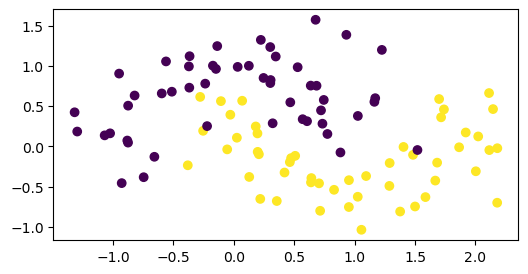

In [19]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(6, 3))
plt.scatter(X[:,0], X[:,1], c=y)

## 1. Bagging 

In [5]:
from sklearn.ensemble import BaggingClassifier

In [6]:
bagging = BaggingClassifier(n_estimators=5) # base_estimator=KNeighborsClassifier()

bagging.fit(X_train, y_train)
bagging.score(X_test, y_test)

0.9333333333333333

In [10]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

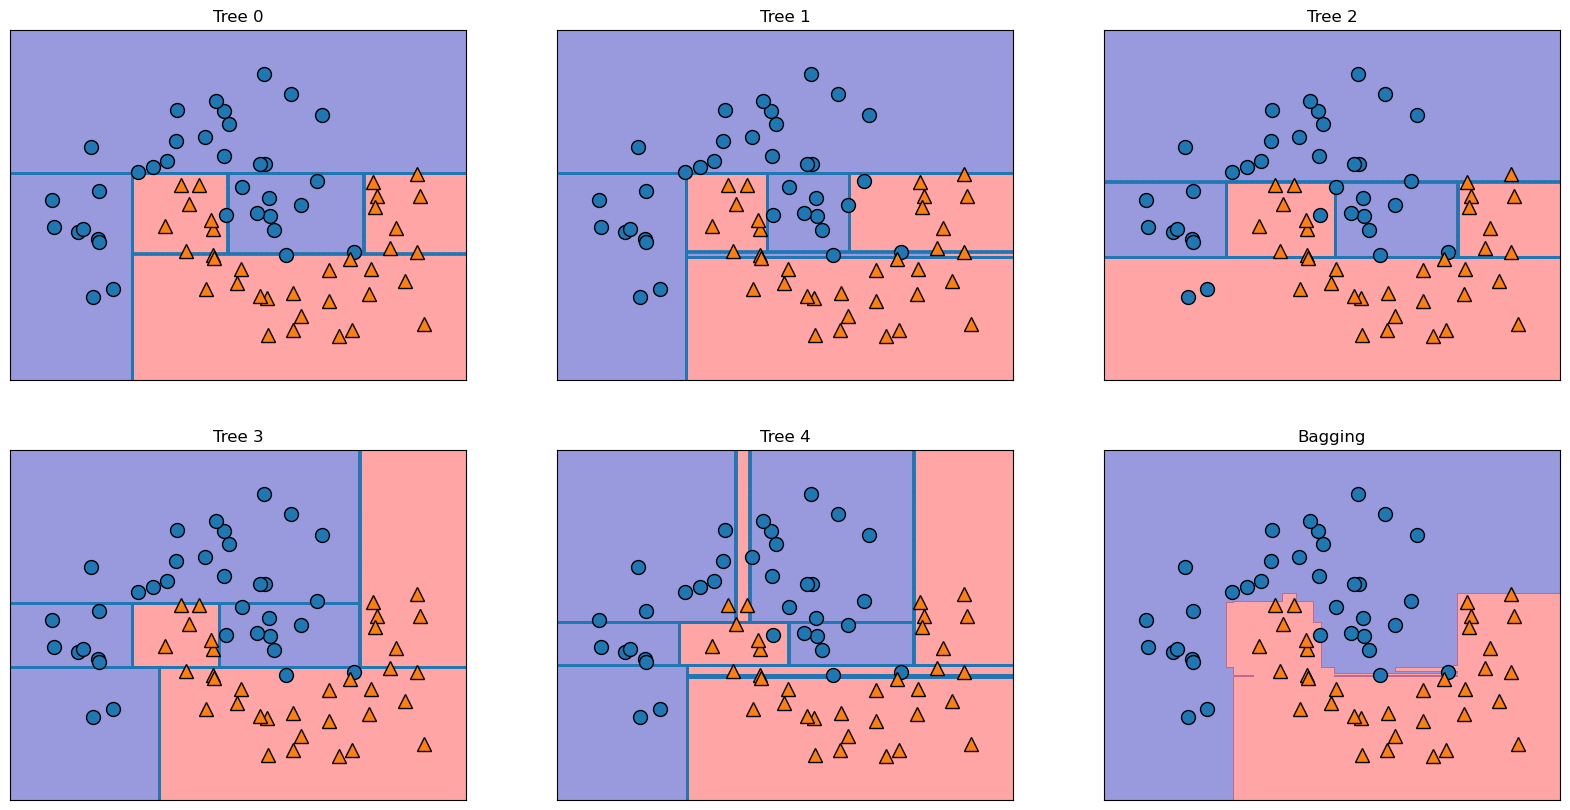

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

## 2. Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [22]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(rfc, prefit=True, threshold=0.005)
X_train2 = select.transform(X_train)
print(X_train2.shape)

(70, 2)


In [23]:
rfc.score(X_test, y_test)

0.9333333333333333

## 3. Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

In [25]:
gbc = GradientBoostingClassifier(n_estimators=5)

gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.9

In [26]:
abc = AdaBoostClassifier(n_estimators=5)

abc.fit(X_train, y_train)
abc.score(X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9333333333333333

## 4. Stacking

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model1 = SGDClassifier(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = KNeighborsClassifier(n_neighbors=2)

model = StackingClassifier([('SGD', model1),
                           ('Tree', model2),
                           ('KNN', model3)],
                          final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667